# Frequencies

Ling 571  
October 16, 2018

Load NLTK and Brown corpus

In [10]:
import nltk
nltk.download('brown')

[nltk_data] Downloading package brown to /root/nltk_data...
[nltk_data]   Package brown is already up-to-date!


True

## Text normalization

Count the number of tokens of each type 

In [0]:
brown = nltk.corpus.brown
words = list(brown.words())

Use `nltk.FreqDist` to produce a [frequency dictionary](https://www.nltk.org/book/ch01.html#frequency-distributions) from a list of tokens

In [0]:
fdist = nltk.FreqDist(words)

BUT: our frequency dictionary includes non-word tokens (like punctuation) and counts upper and lower case versions of words as distinct types!

In [13]:
fdist.most_common(20)

[('the', 62713),
 (',', 58334),
 ('.', 49346),
 ('of', 36080),
 ('and', 27915),
 ('to', 25732),
 ('a', 21881),
 ('in', 19536),
 ('that', 10237),
 ('is', 10011),
 ('was', 9777),
 ('for', 8841),
 ('``', 8837),
 ("''", 8789),
 ('The', 7258),
 ('with', 7012),
 ('it', 6723),
 ('as', 6706),
 ('he', 6566),
 ('his', 6466)]

To fix these problems, we'll **normalize** the text: get rid of puncuation and make everything lower case.

The function `.lower()` converts a single string to lowercase:

In [14]:
'The'.lower()

'the'

In [15]:
'the'.lower()

'the'

In [16]:
'50%'.lower()

'50%'

We need to make a whole list of strings lowercase, though, and `.lower()` doesn't work with lists:

In [0]:
#['The','the'].lower()

When we want to do something to each item in a list, the device to use is a [list comprehension](https://www.nltk.org/book/ch01.html#operating-on-every-element):


> `[` *expr* `for` *var* `in` *seq* `]`

A list comprehension creates a new list by taking each item in *seq*, assigning it the label *var*, and then evaluating *expr*.

For example, the first 10 words in the Brown corpus are:

In [18]:
words[:20]

['The',
 'Fulton',
 'County',
 'Grand',
 'Jury',
 'said',
 'Friday',
 'an',
 'investigation',
 'of',
 "Atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that']

Using a list comphrehension, we can make the lowercase version of that:

In [19]:
[w.lower() for w in words[:20]]

['the',
 'fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'an',
 'investigation',
 'of',
 "atlanta's",
 'recent',
 'primary',
 'election',
 'produced',
 '``',
 'no',
 'evidence',
 "''",
 'that']

Next, we need to filter out the punctiation marks.  We can use the function `.isalpha()` to check to see whether a token is made up of only letters:

In [20]:
'the'.isalpha()

True

In [21]:
','.isalpha()

False

In [22]:
'5'.isalpha()

False

To include only items that pass the test in our output, we use the conditional form of a list comphrehension:

> `[` *expr* `for` *var* `in` *seq* `if` *test* `]`

Tis creates a new list by taking each item in *seq*, assigning it the label *var*, and then evaluating *expr* **only** if *test* is true.

In [23]:
[w.lower() for w in words[:20] if w.isalpha()]

['the',
 'fulton',
 'county',
 'grand',
 'jury',
 'said',
 'friday',
 'an',
 'investigation',
 'of',
 'recent',
 'primary',
 'election',
 'produced',
 'no',
 'evidence',
 'that']

Applying all of this to our frequency dictionary, we get:

In [24]:
fdist = nltk.FreqDist([w.lower() for w in words if w.isalpha()])
fdist.most_common(20)

[('the', 69971),
 ('of', 36412),
 ('and', 28853),
 ('to', 26158),
 ('a', 23195),
 ('in', 21337),
 ('that', 10594),
 ('is', 10109),
 ('was', 9815),
 ('he', 9548),
 ('for', 9489),
 ('it', 8760),
 ('with', 7289),
 ('as', 7253),
 ('his', 6996),
 ('on', 6741),
 ('be', 6377),
 ('at', 5372),
 ('by', 5306),
 ('i', 5164)]

This normalization step is something we'll want to be able to apply to other corpora, so let's define it as a [function](http://greenteapress.com/thinkpython2/html/thinkpython2004.html):

In [0]:
def normalize(tokens):
  return [w.lower() for w in tokens if w.isalpha()]

Now we can do the same with the Treebank corpus (a small sample of the [Penn Treebank](https://web.archive.org/web/19970614160127/http://www.cis.upenn.edu/~treebank/)) and the NPS Chat corpus (a collection of instant messages):

In [26]:
nltk.download(['treebank', 'nps_chat'])


[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package nps_chat to /root/nltk_data...
[nltk_data]   Unzipping corpora/nps_chat.zip.


True

In [27]:
ftree = nltk.FreqDist(normalize(nltk.corpus.treebank.words()))
ftree.most_common(20)

[('the', 4764),
 ('of', 2325),
 ('to', 2182),
 ('a', 1988),
 ('in', 1769),
 ('and', 1556),
 ('for', 853),
 ('that', 848),
 ('is', 672),
 ('said', 628),
 ('it', 577),
 ('on', 508),
 ('by', 440),
 ('at', 430),
 ('as', 415),
 ('with', 398),
 ('from', 391),
 ('million', 383),
 ('are', 369),
 ('was', 367)]

In [28]:
fchat = nltk.FreqDist(normalize(nltk.corpus.nps_chat.words()))
fchat.most_common(20)

[('i', 1224),
 ('part', 1022),
 ('join', 1021),
 ('lol', 822),
 ('you', 686),
 ('to', 665),
 ('the', 660),
 ('hi', 656),
 ('a', 580),
 ('me', 428),
 ('is', 380),
 ('in', 364),
 ('and', 357),
 ('it', 355),
 ('action', 347),
 ('hey', 292),
 ('that', 284),
 ('my', 259),
 ('of', 207),
 ('u', 204)]

The top 20 words in the Treebank corpus more or less the same as we saw for the Brown corpus, since both are made up of published written American English.  But, the most frequent words in the Chat corpus are very different!

In [29]:
brown.tagged_words()[:10]

[('The', 'AT'),
 ('Fulton', 'NP-TL'),
 ('County', 'NN-TL'),
 ('Grand', 'JJ-TL'),
 ('Jury', 'NN-TL'),
 ('said', 'VBD'),
 ('Friday', 'NR'),
 ('an', 'AT'),
 ('investigation', 'NN'),
 ('of', 'IN')]

-----

## Tag frequencies

What is the most frequent tag in the Brown corpus?

In [30]:
nltk.FreqDist(brown.tagged_words()).most_common(10)

[(('the', 'AT'), 62288),
 ((',', ','), 58153),
 (('.', '.'), 48812),
 (('of', 'IN'), 34864),
 (('and', 'CC'), 27676),
 (('a', 'AT'), 21824),
 (('in', 'IN'), 18975),
 (('to', 'TO'), 14679),
 (('to', 'IN'), 10903),
 (('is', 'BEZ'), 9976)]

That's a count of words and tags together, which isn't what we want. 

To count just tags, we can use a list comprehension to transform a list of word/tag pairs in to a list of tags (tossing out the words):

In [31]:
[t for (w,t) in brown.tagged_words()[:10]]

['AT', 'NP-TL', 'NN-TL', 'JJ-TL', 'NN-TL', 'VBD', 'NR', 'AT', 'NN', 'IN']

And to build a frequency dictionary from that:

In [32]:
ftags = nltk.FreqDist([t for (w,t) in brown.tagged_words()])
ftags.most_common(10)

[('NN', 152470),
 ('IN', 120557),
 ('AT', 97959),
 ('JJ', 64028),
 ('.', 60638),
 (',', 58156),
 ('NNS', 55110),
 ('CC', 37718),
 ('RB', 36464),
 ('NP', 34476)]

The most frequent tag is NN, which represents a singular common noun (see [here](https://link.springer.com/content/pdf/bbm%3A978-94-015-9273-4%2F1.pdf) for a complete list of tags).

And, if we plot tag frequency rank by tag frequency, we get the same Zipf's Law relationship that we saw for word frequencies:

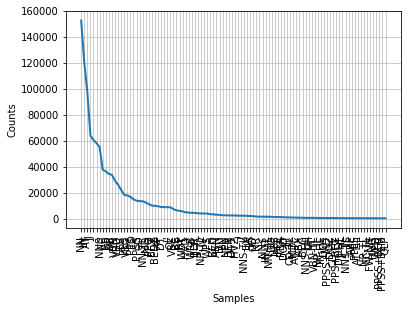

In [33]:
ftags.plot(100)

In [34]:
brown = nltk.corpus.brown
nltk.FreqDist(brown.tagged_words()).most_common(10)

[(('the', 'AT'), 62288),
 ((',', ','), 58153),
 (('.', '.'), 48812),
 (('of', 'IN'), 34864),
 (('and', 'CC'), 27676),
 (('a', 'AT'), 21824),
 (('in', 'IN'), 18975),
 (('to', 'TO'), 14679),
 (('to', 'IN'), 10903),
 (('is', 'BEZ'), 9976)]

In [35]:
tags = nltk.FreqDist(t for (w,t) in brown.tagged_words)(10)

TypeError: ignored

In [0]:
run = [t for (w,t) in brown.tagged_words(tagset='universal')
      if w.lower() == 'run']

In [0]:
print(brown.tagged_words(10))